In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [4]:
data_dir = os.path.join('.','data')

ref = pd.read_excel(os.path.join(data_dir, 'GroundTruths.xlsx'), 
                    names=['file', 'date_time'])
ref.date_time = pd.to_datetime(ref.date_time)
# sns.rugplot(ref['event DateTime'])
# with sns.axes_style(style='darkgrid'):
#     plt.figure(figsize=(12,1))
#     sns.stripplot(x=ref['date_time'], y=ref['file'],
#                  orient='h')# ref
#     plt.xticks(rotation=15)
#     plt.title('Anomalous Events')

In [5]:


# if not os.path.isfile(os.path.join(data_dir, 'completeDB.csv')):
#     print('reading in...')
#     df = pd.concat([pd.read_csv(os.path.join(data_dir, 'data_6302.csv'), 
#                                  index_col=0, parse_dates=True),
#                     pd.read_csv(os.path.join(data_dir, 'data_7600.csv'), 
#                                  index_col=0, parse_dates=True),
#                     pd.read_csv(os.path.join(data_dir, 'data_7664.csv'), 
#                                  index_col=0, parse_dates=True)])
#     print('creating h5...')
#     df.to_hdf(os.path.join(data_dir, 'completeDB.h5'))
#     print('done!')
# else:
#     print('reading h5...')
#     df = pd.read_csv(os.path.join(data_dir, 'completeDB.csv'), index_col=0)
#     print('done!')
df = pd.read_csv(os.path.join(data_dir, 'data_6302.csv'), index_col=0)


In [6]:
df.head()

,DWATT,TNH,CTIM,TXM,T_1,T_2,T_3,T_4,T_5,T_6,...,T_18,T_19,T_20,T_21,T_22,T_23,T_24,T_25,T_26,T_27
date_time,,,,,,,,,,,,,,,,,,,,,
4/1/2010 0:01,0.0,0.0,61.5508,68.6880,69.3622,69.6943,69.2811,69.1613,68.9111,68.9601,...,68.9846,67.9353,69.9003,69.6597,68.4944,70.4803,70.2361,69.0025,71.2369,70.7852
4/1/2010 0:02,0.0,0.0,61.5484,68.6872,69.3614,69.6929,69.2799,69.1613,68.9098,68.9595,...,68.9867,67.9348,69.9006,69.6606,68.4947,70.4810,70.2352,69.0017,71.2356,70.7840
4/1/2010 0:03,0.0,0.0,61.5460,68.6864,69.3606,69.6915,69.2787,69.1613,68.9085,68.9589,...,68.9887,67.9343,69.9010,69.6615,68.4951,70.4818,70.2343,69.0009,71.2343,70.7828
4/1/2010 0:04,0.0,0.0,61.5437,68.6856,69.3597,69.6900,69.2776,69.1614,68.9073,68.9583,...,68.9907,67.9337,69.9014,69.6624,68.4955,70.4825,70.2334,69.0001,71.2331,70.7815
4/1/2010 0:05,0.0,0.0,61.5413,68.6848,69.3589,69.6886,69.2764,69.1614,68.9060,68.9576,...,68.9927,67.9332,69.9017,69.6633,68.4959,70.4832,70.2325,68.9994,71.2318,70.7803


In [7]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_n = scale.fit_transform(df.values)
df_n = pd.DataFrame(data=df_n, index=df.index, columns=df.columns)

# ddf = dd.from_pandas(df, npartitions=3)

# def scale(df):
#     return (df-df.mean()).div(df.std())
# ddf.map_partitions(scale)
# ddf.div()
# scale = ddf.sub(ddf.mean(axis=0).compute()).div(ddf.std(axis=0))
# df_n = scale.compute()
df_n.head()
# df.T_1.plot(kind='kde')

,DWATT,TNH,CTIM,TXM,T_1,T_2,T_3,T_4,T_5,T_6,...,T_18,T_19,T_20,T_21,T_22,T_23,T_24,T_25,T_26,T_27
date_time,,,,,,,,,,,,,,,,,,,,,
4/1/2010 0:01,-0.04247,-0.064198,0.000755,-0.452382,-0.456538,-0.475757,-0.452896,-0.458635,-0.456171,-0.457126,...,-0.447052,-0.454683,-0.454825,-0.454370,-0.446376,-0.453965,-0.458338,-0.452819,-0.427404,-0.477990
4/1/2010 0:02,-0.04247,-0.064198,0.000753,-0.452383,-0.456539,-0.475758,-0.452897,-0.458635,-0.456172,-0.457127,...,-0.447050,-0.454684,-0.454824,-0.454370,-0.446376,-0.453965,-0.458339,-0.452819,-0.427405,-0.477991
4/1/2010 0:03,-0.04247,-0.064198,0.000751,-0.452383,-0.456540,-0.475759,-0.452898,-0.458635,-0.456173,-0.457127,...,-0.447049,-0.454684,-0.454824,-0.454369,-0.446375,-0.453964,-0.458339,-0.452820,-0.427406,-0.477992
4/1/2010 0:04,-0.04247,-0.064198,0.000749,-0.452384,-0.456540,-0.475760,-0.452898,-0.458635,-0.456174,-0.457128,...,-0.447047,-0.454685,-0.454824,-0.454368,-0.446375,-0.453963,-0.458340,-0.452820,-0.427407,-0.477993
4/1/2010 0:05,-0.04247,-0.064198,0.000746,-0.452385,-0.456541,-0.475762,-0.452899,-0.458635,-0.456175,-0.457128,...,-0.447045,-0.454685,-0.454823,-0.454367,-0.446375,-0.453963,-0.458341,-0.452821,-0.427408,-0.477994


In [8]:
# from dask import dataframe as dd
# from dask.multiprocessing import get


#use dask to set up the filter quickly
# ddf = dd.from_pandas(df_n, npartitions=5, name='scale_dask_data')
# mask = (ddf.abs() < 3.)
# mask.shape[0] - mask.any(axis=1).sum()
# dfo = df_n[mask.any(axis=1).compute().values]
dfo = df_n[df_n.abs()<3]
dfo.index = pd.to_datetime(dfo.index)
# dfo.shape, df_n.shape

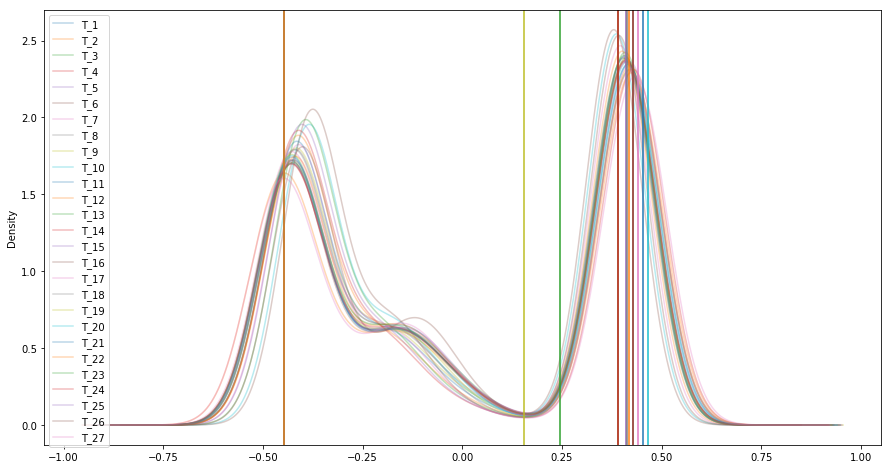

In [9]:
dfr = dfo.resample('1h').mean()
dfr.loc[:,'T_1':].plot(kind='kde', alpha=.3, figsize=(15,8))
# df_n.T_1.plot(kind='hist', bins=50)

cols = sns.color_palette(n_colors=ref.shape[0])

for n,t in enumerate(ref.date_time.values):
#     plt.vlines(dfo.iloc[dfo.index.get_loc(t, method='nearest')], 0, 2.5, color=cols[n], alpha=.2)
    plt.axvline(dfo.iloc[dfo.index.get_loc(t, method='nearest')].median(), color=cols[n])

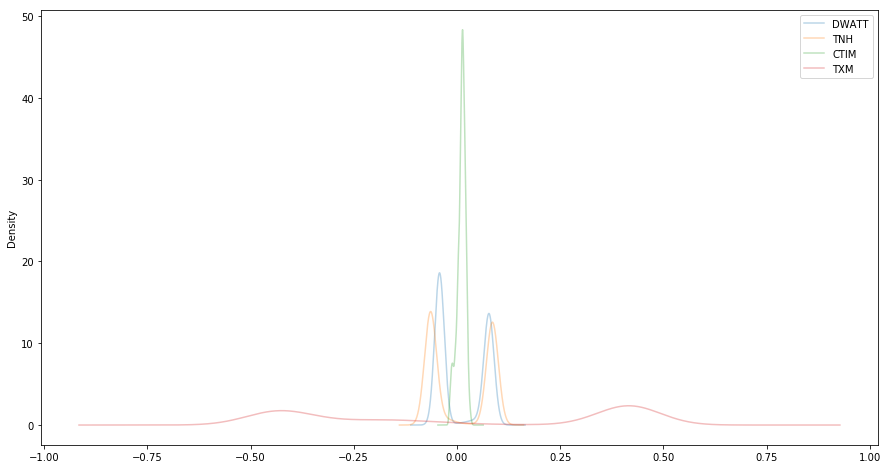

In [10]:
dfr.loc[:,:'TXM'].plot(kind='kde', alpha=.3, figsize=(15,8))

In [11]:
target = pd.Series(index=dfo.index, data=0)
target[np.isin(dfo.index,ref.date_time)] = 1


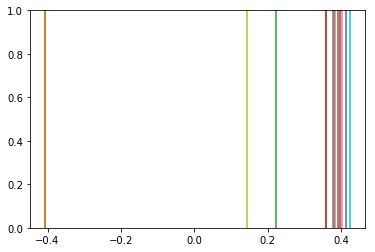

In [12]:
mask = (dfo.index-dfo.index.shift(-1, freq='60s')) == np.timedelta64(0,'60s')

cols = sns.color_palette(n_colors=ref.shape[0])

for n,t in enumerate(ref.date_time.values):
#     plt.vlines(dfo.iloc[dfo.index.get_loc(t)], 0, 2.5, color=cols[n])
    plt.axvline(dfo.iloc[dfo.index.get_loc(t, method='nearest')].mean(), color=cols[n])


In [13]:
from pomegranate import *

ndim = dfo.shape[1]

mu = np.arange(ndim)
cov = np.eye(ndim)

# mgs = [ MultivariateGaussianDistribution( mu*i, cov ) for i in range(4) ]
mgs = [ NormalDistribution(-.5, .1), NormalDistribution(-.1, .1), NormalDistribution(.5, .1)]

gmm = GeneralMixtureModel( mgs )
# hmm = HiddenMarkovModel()
gmm

{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "frozen" : false,
            "parameters" : [
                -0.5,
                0.1
            ],
            "name" : "NormalDistribution",
            "class" : "Distribution"
        },
        {
            "frozen" : false,
            "parameters" : [
                -0.1,
                0.1
            ],
            "name" : "NormalDistribution",
            "class" : "Distribution"
        },
        {
            "frozen" : false,
            "parameters" : [
                0.5,
                0.1
            ],
            "name" : "NormalDistribution",
            "class" : "Distribution"
        }
    ],
    "weights" : [
        -1.0986122886681098,
        -1.0986122886681098,
        -1.0986122886681098
    ]
}

In [14]:
gmm.fit(dfr.T_2.values, verbose=True, stop_threshold=1)

Improvement: 3611.9320779171785
Improvement: 289.3498166296836
Improvement: 136.8169332050311
Improvement: 51.95956065410519
Improvement: 22.66750580474445
Improvement: 12.224011753076866
Improvement: 8.07287113805296
Improvement: 6.175227466746037
Improvement: 5.334321943543273
Improvement: 5.1247662187188325
Improvement: 5.425330100879819
Improvement: 6.299616895150848
Improvement: 7.999775017631691
Improvement: 11.018423115830046
Improvement: 15.967453070795727
Improvement: 22.429373770913116
Improvement: 26.390665803541197
Improvement: 23.361004406181564
Improvement: 17.6591497695008
Improvement: 14.756845097620499
Improvement: 15.026806331269654
Improvement: 4.663566806876588
Improvement: 0.4515298248388717
Total Improvement: 4321.106632741911


4321.106632741911

In [15]:
gmm.distributions

array([ {
    "frozen" :false,
    "parameters" :[
        -0.4680137674026034,
        0.01
    ],
    "name" :"NormalDistribution",
    "class" :"Distribution"
},
       {
    "frozen" :false,
    "parameters" :[
        -0.22936456791920354,
        0.18370158074373413
    ],
    "name" :"NormalDistribution",
    "class" :"Distribution"
},
       {
    "frozen" :false,
    "parameters" :[
        0.4253082929738846,
        0.01
    ],
    "name" :"NormalDistribution",
    "class" :"Distribution"
}], dtype=object)

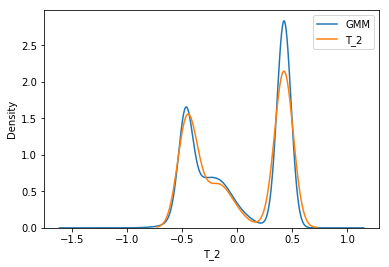

In [16]:
pd.DataFrame(np.array(gmm.sample(10000))).plot(kind='kde', label='GMM')
sns.distplot(dfr.T_2, hist=False, label='T_2')
plt.legend(['GMM', 'T_2'])

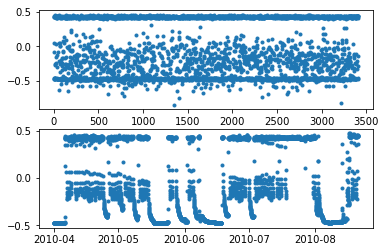

In [17]:
plt.subplot(211)
plt.plot(np.array(gmm.sample(3408)), '.')
plt.subplot(212)
plt.plot(dfr.T_2, '.')


d1 = gmm.distributions[0]
d2 = gmm.distributions[1]
d3 = gmm.distributions[2]

s1 = State(d1, 'b')  # background
s2 = State(d2, 't')  # transition
s3 = State(d3, 'a')  # active

hmm = HiddenMarkovModel('sys-modeler')
hmm.add_states(s1, s2, s3)
hmm.add_transition(hmm.start, s1, 1.)
hmm.add_transition(s1, s1, .5)  # stays off
hmm.add_transition(s1, s2, .5)  # starts
hmm.add_transition(s2, s2, .2)  # still starting
hmm.add_transition(s2, s3, .4)  # to active
hmm.add_transition(s3, s3, .8)  # stays active
hmm.add_transition(s3, s2, .2)  # done
hmm.add_transition(s2, s1, .4)  # off

hmm.bake()

int_seq = gmm.predict(dfr.T_2.values.reshape(-1,1))
state_seq = [{0:'b', 1:'t', 2:'a'}[i] for i in int_seq]
hmm.fit([dfr.T_3.values])


In [112]:
# dists = 27*[NormalDistribution(2,3)]

# model = HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, 
#                                        n_components=3, 
#                                        X=[dfr.loc[:,'T_1':].values[:1000]])
model = HiddenMarkovModel.from_samples(NormalDistribution, 
                                       n_components=7, 
                                       X=[dfr['T_13'].values], 
                                       verbose=True, 
                                       n_jobs=6)
# model

Training improvement: 4621.19726851839
Training improvement: 177.60047193353785
Training improvement: 55.82109843961916
Training improvement: 38.981110529990474
Training improvement: 32.343111915291956
Training improvement: 25.87455877910361
Training improvement: 18.538665269490593
Training improvement: 12.940891592532353
Training improvement: 9.201964206102275
Training improvement: 7.296840952925777
Training improvement: 4.44023661452411
Training improvement: 1.6659070867317496
Training improvement: 0.6812864253388398
Training improvement: 0.3514100789161603
Training improvement: 0.20719825665401004
Training improvement: 0.13457173576171044
Training improvement: 0.09486662202471052
Training improvement: 0.07177256525756093
Training improvement: 0.057769803310293355
Training improvement: 0.04922031858222908
Training improvement: 0.04429710397926101
Training improvement: 0.042047002532854094
Training improvement: 0.04192405837056867
Training improvement: 0.04349855699365435
Training imp

(-0.6, 0.6)

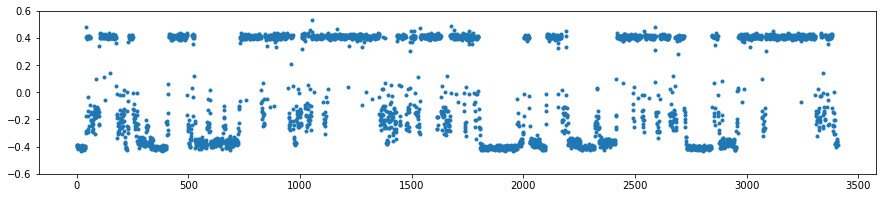

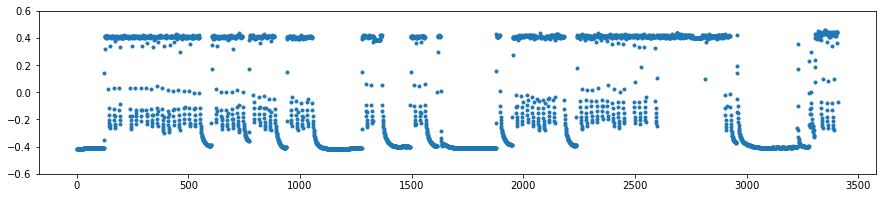

In [113]:
# plt.subplot(211)
plt.figure(figsize=(15,3))
plt.plot(np.array(model.sample(3408)), '.')
# plt.subplot(212)
plt.ylim(-.6, .6)
plt.figure(figsize=(15,3))
plt.plot(dfr.T_13.values, '.')
plt.ylim(-.6, .6)

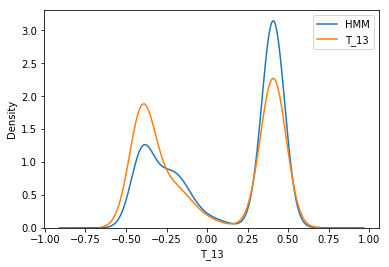

In [114]:
pd.DataFrame(np.array(model.sample(3408))).plot(kind='kde', label='HMM')
sns.distplot(dfr.T_13, hist=False, label='T_13')
plt.legend(['HMM', 'T_13'])

In [115]:
model.log_probability(dfr['T_13'].values)

9228.130132106346

(0.0, 10)

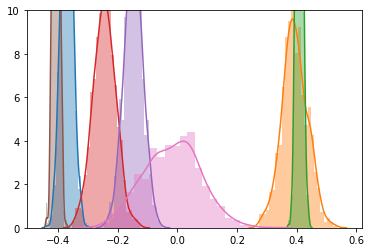

In [117]:
for dist in model.states[:7]:
    sns.distplot(dist.distribution.sample(1000), norm_hist=True)
plt.ylim(ymax=10)

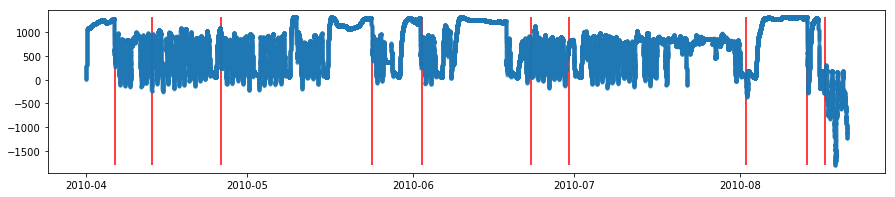

E:\ProgramFiles_w\Engineering\Anaconda\envs\python3\lib\site-packages\matplotlib\scale.py:290: RuntimeWarning: invalid value encountered in sign
  sign = np.sign(a)
E:\ProgramFiles_w\Engineering\Anaconda\envs\python3\lib\site-packages\numpy\ma\core.py:2166: RuntimeWarning: invalid value encountered in greater_equal
  condition = (xf >= v1) & (xf <= v2)
E:\ProgramFiles_w\Engineering\Anaconda\envs\python3\lib\site-packages\numpy\ma\core.py:2166: RuntimeWarning: invalid value encountered in less_equal
  condition = (xf >= v1) & (xf <= v2)


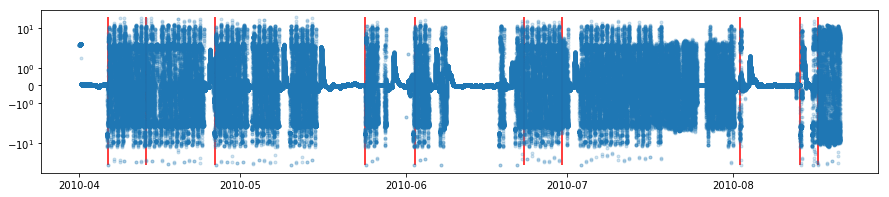

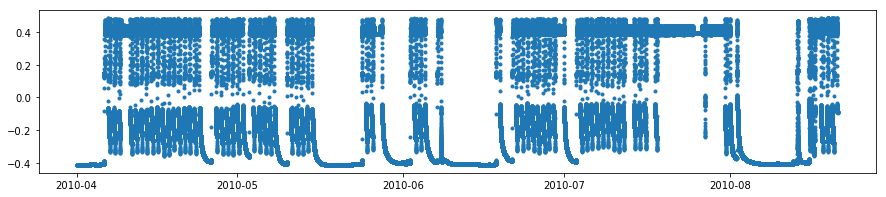

In [23]:
r = dfo.rolling('6h')  # result at right-edge of window. 
lprob = r.T_13.apply(model.log_probability)
# dprob = np.diff(lprob.values, n=2)  #1st-order 2nd der
dprob = pd.Series(np.gradient(lprob), index=lprob.index)  #1st-order 2nd der

plt.figure(figsize=(15,3))
plt.plot(lprob , '.', alpha=.2)
plt.vlines(ref[ref.file==6302].date_time.values, lprob.min(), lprob.max(), color='r')

plt.figure(figsize=(15,3))
# plt.plot(lprob.index[2:], dprob , '.', alpha=.2)
plt.plot(dprob , '.', alpha=.2)
plt.vlines(ref[ref.file==6302].date_time.values, dprob.min(), dprob.max(), color='r')
plt.yscale('symlog')

plt.figure(figsize=(15,3))
plt.plot(dfo.T_13, '.')

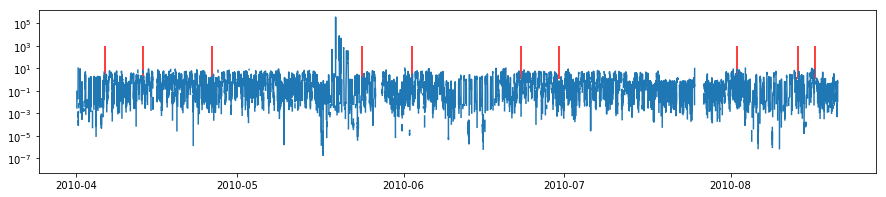

In [24]:
plt.figure(figsize=(15,3))
plt.semilogy(dprob.rolling(100).skew())
plt.vlines(ref[ref.file==6302].date_time.values, 1, 1e3, color='r')
# dprob.rolling('')


# TODO: anomalous REGIONS

# anom = lambda x: np.isin(x.index, ref.date_time).any()
# dfo.index.rolling('6h')
# anom()
# dfo.iloc[:10].index.values

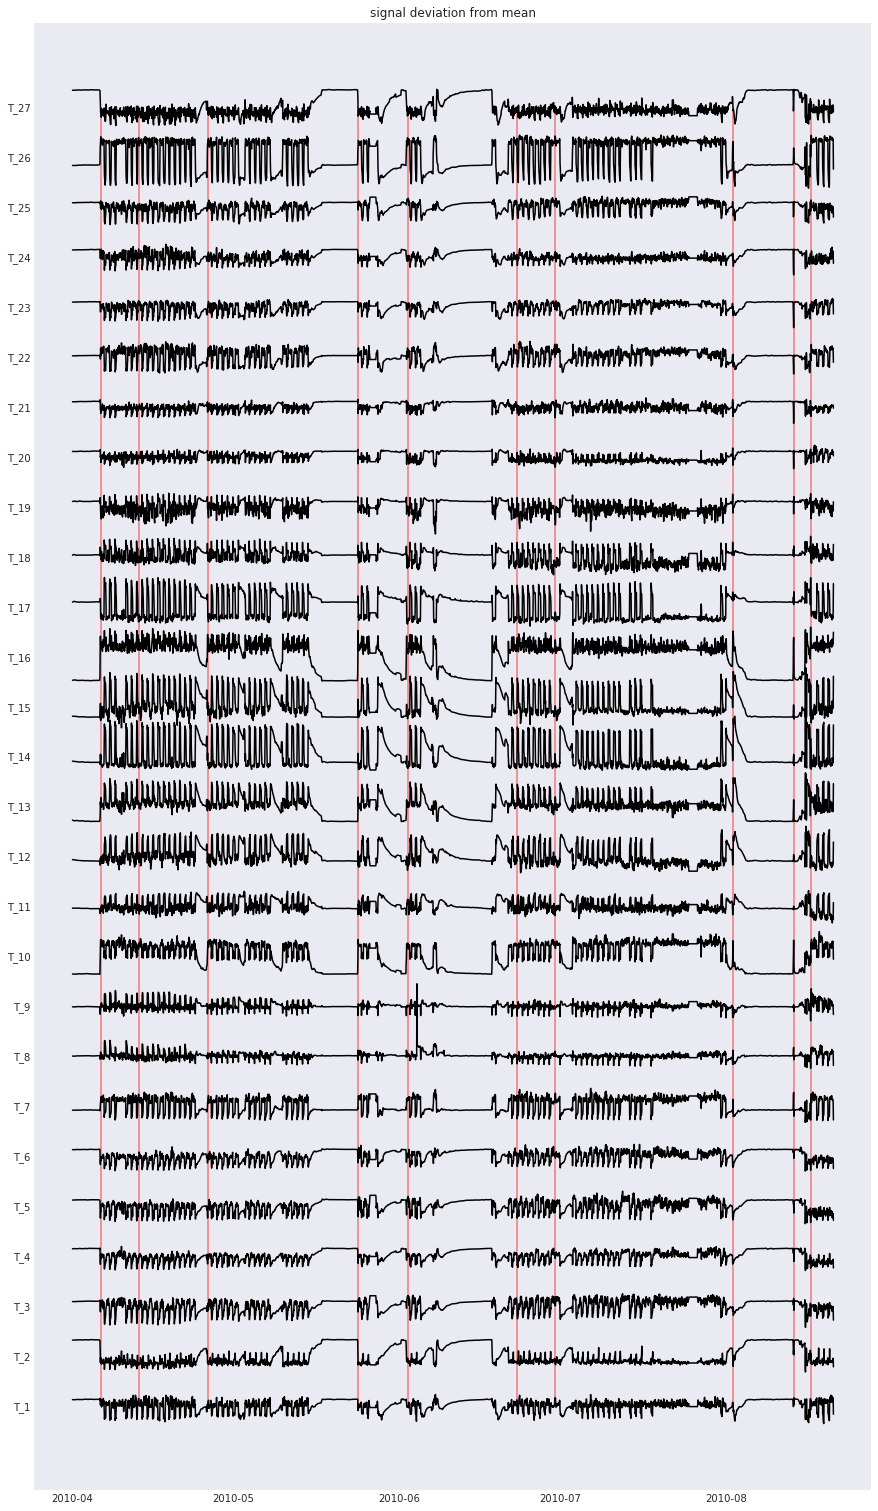

In [25]:
with sns.axes_style('dark'):
    plt.figure(figsize=(15,27))
    
    for i, (name, sig) in enumerate(dfr.loc[:,'T_1':].iteritems()):
        plt.plot(dfr.loc[:,'T_1':].mean(axis=1) - sig+0.1*i, 'k')
    plt.vlines(ref[ref.file==6302].date_time.values, 0, 2.6, color='r', alpha=.5)
    plt.title('signal deviation from mean')
    plt.yticks(np.arange(0,2.8, .1),dfr.loc[:,'T_1':].columns )
    
#     for i, (name, sig) in enumerate(dfr.iteritems()):
#         plt.plot(sig+i, 'k')
#     plt.vlines(ref[ref.file==6302].date_time.values, 0, 26, color='r', alpha=.5)
#     plt.title('signal')
#     plt.yticks(np.arange(0,31),dfr.columns )

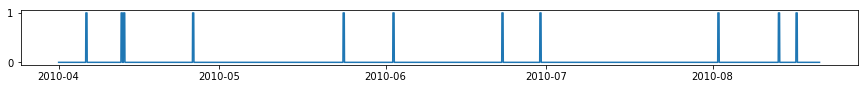

In [118]:
target = pd.Series(index=dfr.index, data=0)
for n,t in ref.date_time.iteritems():
    start_date= t-pd.Timedelta(hours=6)
    end_date = t
    mask = (dfr.index > start_date) & (dfr.index <= end_date)
    times=dfr[mask].index
    target.loc[times] = 1
plt.figure(figsize=(15,1))
plt.plot(target)

In [135]:
[(dfr.index > t-pd.Timedelta(hours=6))&(dfr.index<t) for t in ref.date_time]

[array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., False, False, False], dtype=bool),
 array([False, False, False, ..., 

In [27]:
# dfr.between_time((ref.date_time.iloc[0]-pd.Timedelta(hours=1)).time(), ref.date_time.iloc[0].time())

In [119]:
symbs = model.predict(dfr.T_13.values)

# norm = State( DiscreteDistribution({0:.5, 1: 0.4, 2:.1}), name="N" )
# anom = State( DiscreteDistribution({0:.1, 1:.2, 2:.7}), name="A" )

# lvlmod = HiddenMarkovModel()
# lvlmod.add_states( [norm, anom] )
# lvlmod.add_transition( model.start, norm, 0.5 )
# lvlmod.add_transition( model.start, anom, 0.5 )
# lvlmod.add_transition( norm, anom, 0.5 )
# lvlmod.add_transition( anom, norm, 0.5 )
# lvlmod.bake()

# lvlmod.fit([symbs], verbose=True, labels=[target.map({0:'N', 1:'A'})])

lvlmod = HiddenMarkovModel.from_samples(DiscreteDistribution, n_components=2, 
                                        X=[symbs], 
#                                         labels=[target.map({0:'N', 1:'A'})],
                                        labels=[target.values],
                                       verbose=True)



Training improvement: 1306.8395016156019
Training improvement: 76.75819623131883
Training improvement: 190.08518779411588
Training improvement: 559.6968219779292
Training improvement: 673.2363323038203
Training improvement: 123.50324410952953
Training improvement: 11.374189947739069
Training improvement: 1.6887532930572888
Training improvement: 0.4484358723061632
Training improvement: 0.21430252559048313
Training improvement: 0.1338722349314594
Training improvement: 0.09017979392274356
Training improvement: 0.06185476505697807
Training improvement: 0.04257117146926248
Training improvement: 0.029290433254573145
Training improvement: 0.020131832227434643
Training improvement: 0.013824032575939782
Training improvement: 0.009486567459134676
Training improvement: 0.006507670994778891
Training improvement: 0.004463443092845409
Training improvement: 0.003061227930629684
Training improvement: 0.002099576729506225
Training improvement: 0.0014400944010048988
Training improvement: 0.0009878200949

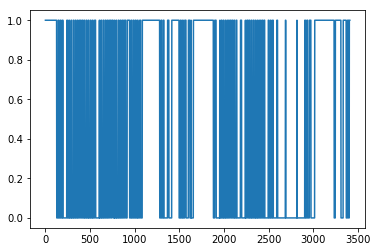

In [121]:
# target.map({0:'N', 1:'A'}).describe()
plt.plot(lvlmod.predict(symbs))

In [ ]:
pd.Series(index=target.index)

In [81]:
# plt.plot(lvlmod.sample(1000))
# plt.plot(lvlmod.predict(symbs))
# target.plot()
labels = pd.DataFrame(target.map({0:'N', 1:'A'}))
labels['pred'] = lvlmod.predict(symbs)
labels.pred = labels.pred.map({0:'N', 1:'A'})
# labels.plot()


In [82]:
labels.describe()

,0,pred
count,3408,3408
unique,2,2
top,N,A
freq,3277,1890


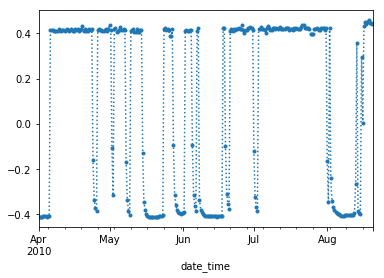

In [125]:
dfr.resample('12h').max().T_13.plot(linestyle=':', marker='.')